In [4]:
import torch
import torch.nn as nn

class NN(nn.Module):
    def __init__(self, input_size, output_size):
        super(NN, self).__init__()
        self.out = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.out(x)
        return x

# Example of using named_children
model = NN(input_size=10, output_size=5)
for name, module in model.named_modules():
    print(name, module)

 NN(
  (out): Linear(in_features=10, out_features=5, bias=True)
)
out Linear(in_features=10, out_features=5, bias=True)


In [10]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split


class MNISTloader:
    def __init__(
        self,
        batch_size: int = 64,
        data_dir: str = "./data/",
        num_workers: int = 0,
        pin_memory: bool = False,
        shuffle: bool = False,
        train_val_split: float = 0.1,
    ):
        self.batch_size = batch_size
        self.data_dir = data_dir
        self.num_workers = num_workers
        self.pin_memory = pin_memory
        self.shuffle = shuffle
        self.train_val_split = train_val_split

        self.setup()

    def setup(self):
        transform = transforms.Compose(
            [
                transforms.Resize((32, 32)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5]),
            ]
        )

        self.train_dataset = datasets.MNIST(
            self.data_dir, train=True, download=True, transform=transform
        )
        val_split = int(len(self.train_dataset) * self.train_val_split)
        train_split = len(self.train_dataset) - val_split

        self.train_dataset, self.val_dataset = random_split(
            self.train_dataset, [train_split, val_split]
        )
        self.test_dataset = datasets.MNIST(
            self.data_dir, train=False, download=True, transform=transform
        )

        print(
            "Image Shape:    {}".format(self.train_dataset[0][0].numpy().shape),
            end="\n\n",
        )
        print("Training Set:   {} samples".format(len(self.train_dataset)))
        print("Validation Set: {} samples".format(len(self.val_dataset)))
        print("Test Set:       {} samples".format(len(self.test_dataset)))

    def load(self):
        train_loader = DataLoader(
            dataset=self.train_dataset,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            pin_memory=self.pin_memory,
            shuffle=self.shuffle,
        )

        val_loader = DataLoader(
            dataset=self.val_dataset,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            pin_memory=self.pin_memory,
            shuffle=self.shuffle,
        )

        test_loader = DataLoader(
            dataset=self.test_dataset,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            pin_memory=self.pin_memory,
            shuffle=self.shuffle,
        )

        return train_loader, val_loader, test_loader


# Load only 1 image
train_loader, val_loader, test_loader = MNISTloader(batch_size=1).load()
for batch_idx, (data, target) in enumerate(train_loader):
    print(data.shape)
    break


Image Shape:    (1, 32, 32)

Training Set:   54000 samples
Validation Set: 6000 samples
Test Set:       10000 samples
torch.Size([1, 1, 32, 32])


In [11]:
print(data.shape)

torch.Size([1, 1, 32, 32])


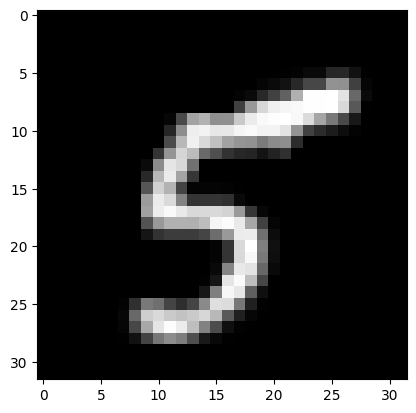

In [12]:
import matplotlib.pyplot as plt

# Plot the first image
plt.imshow(data[0][0], cmap="gray")

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

n = 1024
m = 1024

X = torch.randn(m,m)
W = nn.Parameter(torch.randn(n, m))
b = nn.Parameter(torch.randn(n))


ref = F.linear(X, W, b)
out = F.linear(X, W) + b

torch.testing.assert_close(ref, out, msg=lambda msg: f"{name}:\n{msg}")